In [32]:
##count all positive cells in each image and create a dataframe for futher calculation

import pandas as pd
import numpy as np
import os

#list_image= os.listdir('d:/D_lw/APromotion/Bilder/cd206 main/raw_clean without 40-7 pgl muko/')
#list_cells= os.listdir('d:/D_lw/APromotion/Bilder/cd206 main/img_pos_musk/')


#iba1
list_image= os.listdir('d:/D_lw/APromotion/Bilder/iba1 main/raw_update/')
list_cells= os.listdir('d:/D_lw/APromotion/Bilder/iba1 main/img_pos_musk/')


##ho1
#list_image= os.listdir('d:/D_lw/APromotion/Bilder/ho1 main/img_raw/')
#list_cells= os.listdir('d:/D_lw/APromotion/Bilder/ho1 main/img_pos_all/')
list2=[]


        
list_image = [x[:29].lower() for x in list_image]
list_cells = [x[:29].lower() for x in list_cells]

df = pd.DataFrame(list_image ,columns= ['image'])

df['short_image'] = df['image'].str[:8]


df['portion'] = df['short_image'].str[5:7]
df['animal'] = df['short_image'].str[:2]
df['slide'] = df['short_image'].str[3]
df['layer'] = df['image'].apply(lambda x: 'musk' if 'musk' in x else 'muco')
df['genotype'] = df['animal'].apply(lambda x: 'WT' if int(x) in [36,38,41,43,45] else 'TG')
df['cell_count'] = df['image'].apply(lambda x: list_cells.count(x))

print(df)
print('all cells counted:', df['cell_count'].sum())
df.describe()



                              image short_image portion animal slide layer  \
0     36-4 py iba1 musk 20x_3385_rg    36-4 py       py     36     4  musk   
1     36-4 py iba1 musk 20x_3386_rg    36-4 py       py     36     4  musk   
2     36-4 py iba1 musk 20x_3387_rg    36-4 py       py     36     4  musk   
3     36-4 py iba1 musk 20x_3388_rg    36-4 py       py     36     4  musk   
4     36-4 py iba1 musk 20x_3389_rg    36-4 py       py     36     4  musk   
...                             ...         ...     ...    ...   ...   ...   
1783  45-7 py iba1 musk 20x_5109_rg    45-7 py       py     45     7  musk   
1784  45-7 py iba1 musk 20x_5110_rg    45-7 py       py     45     7  musk   
1785  45-7 py iba1 musk 20x_5111_rg    45-7 py       py     45     7  musk   
1786  45-7 py iba1 musk 20x_5112_rg    45-7 py       py     45     7  musk   
1787  45-7 py iba1 musk 20x_5113_rg    45-7 py       py     45     7  musk   

     genotype  cell_count  
0          WT           0  
1      

,cell_count
count,1788.000000
mean,4.196868
std,8.028653
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,66.000000


['blue', 'blue', 'blue', 'blue', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange']
                  portion mean_cell_slide          
                                     mean       std
0       Pars\nglandularis        8.625099  4.535832
1  Pars\nproventricularis        9.518137  5.721075
2          Pars\npylorica        5.693088  5.788469
  genotype animal  cell_count       std
0       TG     37    8.093158  4.014672
1       TG     39    6.271844  2.339461
2       TG     40   10.473166  6.818711
3       TG     42    3.238274  2.269018
4       TG     44    6.522578  4.416920
5       WT     36   12.241304  8.252994
6       WT     38    9.081561  5.305345
7       WT     41    5.887886  3.502256
8       WT     43   13.208075  6.671281
9       WT     45    5.660516  2.563625
  genotype cell_count          
                 mean       std
0       TG   6.919804  2.652095
1       WT   9.215868  3.493745
Shapiro-Wilk WT: 0.3032957911491394 TG: 0.9291664361953735
levenes test:  0.39053

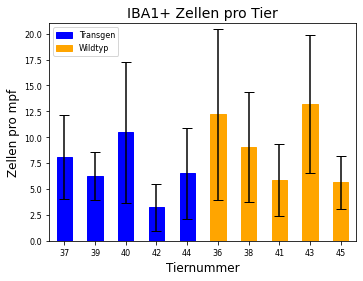

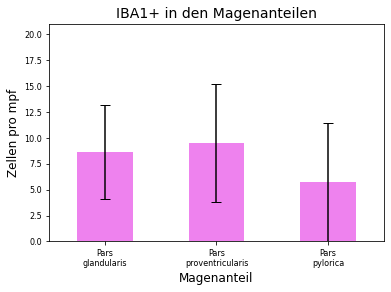

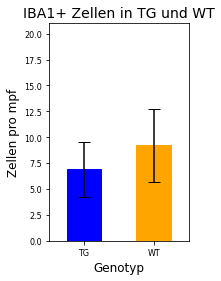

In [33]:
##calculate and plot the counts in each portion, animal and genotype

import matplotlib.pyplot as plt


#marker = 'CD206+'
marker = 'IBA1+'
ymax = 21


df_musk = df.loc[df['layer']=='musk', ['image','short_image','genotype','animal', 'portion', 'cell_count']]
#print(df_musk)
portion_short = ['pp', 'pg', 'py']
portion =['proventricularis', 'glandularis', 'pylorica']


df_slide = df_musk.groupby(['short_image']).agg({'cell_count': ['mean', 'std']}).reset_index()
df_slide['animal'] = df_slide['short_image'].str[:2]
df_slide['genotype'] = df_slide['animal'].apply(lambda x: 'WT' if int(x) in [36,38,41,43,45] else 'TG')
df_slide['portion_short'] = df_slide['short_image'].str[5:7]
df_slide['portion'] = df_slide['portion_short'].apply(lambda x: 'Pars' + '\n' + portion[portion_short.index(x)])
df_slide.columns = ['slide', 'mean_cell_slide', 'std_cell_slide', 'animal','genotype','portion_short', 'portion']
#print(df_slide)

#create Dataframe by animal

df_animal = df_slide.groupby(['animal']).agg({'mean_cell_slide': ['mean', 'std']}).reset_index()
df_animal['genotype'] = df_animal['animal'].apply(lambda x: 'WT' if int(x) in [36,38,41,43,45] else 'TG')

df_animal = df_animal.sort_values(['genotype'])
df_animal.columns = ['animal', 'cell_count_mean', 'std', 'genotype']

#plot barplot by animal

colors_animal = ['blue']*5+['orange']*5

ax = df_animal.plot(kind= 'bar', x='animal', y= 'mean_cell_slide',yerr = 'std',
                     ylim = (0,ymax),capsize= 5, stacked = True, figsize = [5.5,4]) 

for idx, bar in enumerate(ax.patches):
    bar.set_color(colors_animal[idx])

ax.tick_params(axis='x', labelrotation=0)

colors = {'Transgen':'blue', 'Wildtyp':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title(marker +' Zellen pro Tier', fontsize = 14)
#ax.legend(labels = ['Wildtyp', 'Transgen'])
plt.ylabel('Zellen pro mpf', fontsize = 12)
plt.xlabel('Tiernummer', fontsize = 12)
plt.xticks(fontsize =12)
#set Dataframe by Portion

df_portion = df_slide.groupby(['portion']).agg({'mean_cell_slide': ['mean', 'std']}).reset_index()
colors_portion = ['orange', 'blue', 'green']
print(df_portion)

#plot mean cellcount by portion
ax = df_portion.plot(kind= 'bar', y= 'mean_cell_slide',yerr = 'std',x = 'portion', capsize=5, stacked = True,ylim = (0, ymax), 
                color = 'violet', legend = None) 

plt.title(marker + " in den Magenanteilen", fontsize = 14)
plt.ylabel('Zellen pro mpf', fontsize = 12)
plt.xlabel('Magenanteil', fontsize =12)
plt.xticks(fontsize =12)
#plt.show()
ax.tick_params(axis='x', labelrotation=0)

#calculate a df sorted by genotype
df_genotype = df_slide.groupby(['genotype', 'animal']).agg({'mean_cell_slide': ['mean', 'std']}).reset_index()

df_genotype.columns = ['genotype', 'animal', 'cell_count', 'std']
print(df_genotype)
df_genotype2 = df_genotype.groupby(['genotype']).agg({'cell_count': ['mean', 'std']}).reset_index()
print(df_genotype2)


colors_genotype = ['blue', 'orange']
ax = df_genotype2.plot(kind= 'bar', y= 'cell_count',yerr = 'std',x = 'genotype', capsize=6, stacked = True,ylim = (0,ymax), 
                 figsize = [2.5,4], legend = None) 

# Assign custom colors to each bar
for idx, bar in enumerate(ax.patches):
    bar.set_color(colors_genotype[idx])
plt.title(marker +" Zellen in TG und WT", fontsize = 14)
plt.ylabel('Zellen pro mpf', fontsize = 12)
plt.xlabel('Genotyp', fontsize = 12)
plt.xticks(fontsize =12)
ax.tick_params(axis='x', labelrotation=0)
df_portion_genotype = df_slide.groupby(['genotype','portion']).agg({'mean_cell_slide': ['mean', 'std']}).reset_index()


import scipy.stats as stats

groupA = df_genotype.groupby('genotype').get_group('WT')['cell_count']
groupB = df_genotype.groupby('genotype').get_group('TG')['cell_count']
t_stat, p_value = stats.ttest_ind(groupA, groupB)

## print the results

#Shapiro Wilk


# Test for normal distribution using the Shapiro-Wilk test
_, p1 = stats.shapiro(groupA)
_, p2 = stats.shapiro(groupB)
print('Shapiro-Wilk WT:', p1, 'TG:', p2)



# Test for variance equality using Levene's test
_, p3 = stats.levene(groupA, groupB)
print('levenes test: ', p3)

print('t-statistic:', t_stat)
print('p-value:', p_value)

df_animal.to_pickle(marker+'animal.pkl') 


  genotype  quotient          
                mean       std
0       TG  0.814153  0.394756
1       WT  0.660116  0.239569
Shapiro-Wilk WT: 0.43158939480781555 TG: 0.5226098299026489
levenes test:  0.2551066174667321
t-statistic: -0.7459159096137824
p-value: 0.47706141568160254


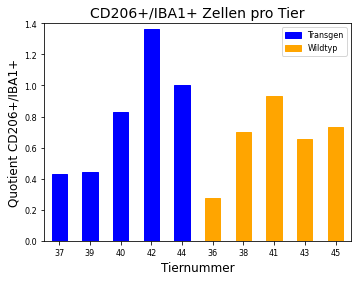

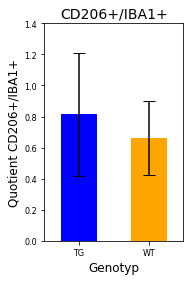

In [71]:
##plot the quotient of CD206 to IBA1

#create Dataframe with quotient

df_animal_iba1 = pd.read_pickle('IBA1+animal.pkl')
df_animal_cd206 = pd.read_pickle('CD206+animal.pkl') 
#print(df_animal_iba1)
#print(df_animal_cd206)
df_quotient= df_animal_iba1.filter(['animal', 'genotype', 'cell_count_mean'])
df_quotient.columns=['animal', 'genotype', 'iba1']
df_quotient['cd206'] = df_animal_cd206['cell_count_mean']
df_quotient['quotient'] = df_quotient['cd206']/df_quotient['iba1']
df_quotient

#plot df_quotient

ymax= 1.4
colors_animal = ['blue']*5+['orange']*5

ax = df_quotient.plot(kind= 'bar', x='animal', y= 'quotient',
                     ylim = (0,ymax),capsize= 5, stacked = True, figsize = [5.5,4]) 

for idx, bar in enumerate(ax.patches):
    bar.set_color(colors_animal[idx])

ax.tick_params(axis='x', labelrotation=0)

colors = {'Transgen':'blue', 'Wildtyp':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title('CD206+/IBA1+ Zellen pro Tier', fontsize = 14)
#ax.legend(labels = ['Wildtyp', 'Transgen'])
plt.ylabel('Quotient CD206+/IBA1+', fontsize = 12)
plt.xlabel('Tiernummer', fontsize = 12)
plt.xticks(fontsize =12)


#make df sorted by genotype of the quotients
df_genotype3 = df_quotient.groupby(['genotype']).agg({'quotient': ['mean', 'std']}).reset_index()
print(df_genotype3)


colors_genotype = ['blue', 'orange']
ax = df_genotype3.plot(kind= 'bar', y= 'quotient',yerr = 'std',x = 'genotype', capsize=6, stacked = True,ylim = (0,ymax), 
                 figsize = [2.5,4], legend = None) 

# Assign custom colors to each bar
for idx, bar in enumerate(ax.patches):
    bar.set_color(colors_genotype[idx])
plt.title('CD206+/IBA1+', fontsize = 14)
plt.ylabel('Quotient CD206+/IBA1+', fontsize = 12)
plt.xlabel('Genotyp', fontsize = 12)
plt.xticks(fontsize =12)
ax.tick_params(axis='x', labelrotation=0)
df_portion_genotype = df_slide.groupby(['genotype','portion']).agg({'mean_cell_slide': ['mean', 'std']}).reset_index()


#do statistics
import scipy.stats as stats

groupA = df_quotient.groupby('genotype').get_group('WT')['quotient']
groupB = df_quotient.groupby('genotype').get_group('TG')['quotient']
t_stat, p_value = stats.ttest_ind(groupA, groupB)

# print the results

#Shapiro Wilk


# Test for normal distribution using the Shapiro-Wilk test
_, p1 = stats.shapiro(groupA)
_, p2 = stats.shapiro(groupB)
print('Shapiro-Wilk WT:', p1, 'TG:', p2)



# Test for variance equality using Levene's test
_, p3 = stats.levene(groupA, groupB)
print('levenes test: ', p3)

print('t-statistic:', t_stat)
print('p-value:', p_value)





  animal  cell_count_mean       std genotype
1     37         0.528073  0.388316       TG
3     39         0.382079  0.389353       TG
4     40         0.430215  0.370592       TG
6     42         0.345589  0.233198       TG
8     44         0.397562  0.147055       TG
0     36         0.632949  0.410108       WT
2     38         0.448784  0.275613       WT
5     41         0.334921  0.292931       WT
7     43         0.394020  0.201738       WT
9     45         0.443109  0.318312       WT


                  portion      mean       std  n
1  Pars\nproventricularis  0.345518  0.173706  1
0       Pars\nglandularis  0.777442  0.201411  2
2          Pars\npylorica  0.178230  0.103241  3
  genotype animal  cell_count       std
0       TG     37    0.528073  0.388316
1       TG     39    0.382079  0.389353
2       TG     40    0.430215  0.370592
3       TG     42    0.345589  0.233198
4       TG     44    0.397562  0.147055
5       WT     36    0.632949  0.410108
6       WT     38    0.448784  0.275613
7       WT     41    0.334921  0.292931
8       WT     43    0.394020  0.201738
9       WT     45    0.443109  0.318312
  genotype cell_count          
                 mean       std
0       TG   0.416703  0.069297
1       WT   0.450756  0.111684
Shapiro-Wilk WT: 0.3821021020412445 TG: 0.5272367000579834
levenes test:  0.5789304812219438
t-statistic: 0.579329203314439
p-value: 0.5783111220785238


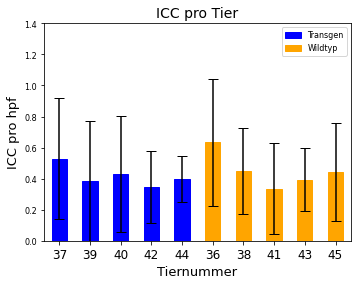

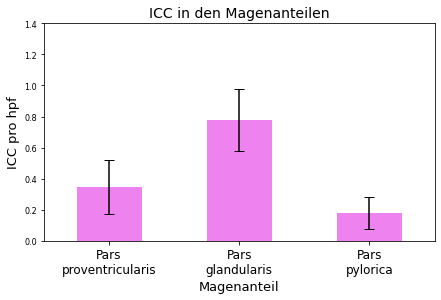

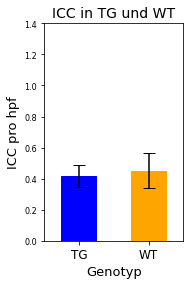

In [124]:
#calculation and plotting of c-kit

marker = 'ICC'

portion_short = ['pp', 'pg', 'py']
portion =['proventricularis', 'glandularis', 'pylorica']


df_ckit = pd.read_csv('ckit_count_fin.csv', ';')
df_ckit['animal'] = df_ckit['slide'].str[:2]
df_ckit['portion_short'] = df_ckit['slide'].str[4:6]
df_ckit['portion'] = df_ckit['portion_short'].apply(lambda x: 'Pars' + '\n' + portion[portion_short.index(x)])
df_ckit['genotype'] = df_ckit['animal'].apply(lambda x: 'WT' if int(x) in [36,38,41,43,45] else 'TG')


df_ckit.columns = ['slide', 'mean_cell_slide', 'animal', 'portion_short', 'portion', 'genotype']
#print(df_ckit)


#create Dataframe by animal

df_animal_ckit = df_ckit.groupby(['animal']).agg({'mean_cell_slide': ['mean', 'std']}).reset_index()
df_animal_ckit['genotype'] = df_animal_ckit['animal'].apply(lambda x: 'WT' if int(x) in [36,38,41,43,45] else 'TG')

df_animal_ckit = df_animal_ckit.sort_values(['genotype'])
df_animal_ckit.columns = ['animal', 'cell_count_mean', 'std', 'genotype']
print(df_animal_ckit)
#plot barplot by animal

colors_animal = ['blue']*5+['orange']*5

ax = df_animal_ckit.plot(kind= 'bar', x='animal', y= 'cell_count_mean',yerr = 'std',
                     ylim = (0,ymax),capsize= 5, stacked = True, figsize = [5.5,4]) 

for idx, bar in enumerate(ax.patches):
    bar.set_color(colors_animal[idx])

ax.tick_params(axis='x', labelrotation=0)

colors = {'Transgen':'blue', 'Wildtyp':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title(marker +' pro Tier', fontsize = 14)
#ax.legend(labels = ['Wildtyp', 'Transgen'])
plt.ylabel('ICC pro hpf', fontsize = 13)
plt.xlabel('Tiernummer', fontsize = 13)
plt.xticks(fontsize =12)
#set Dataframe by Portion

df_portion_ckit = df_ckit.groupby(['portion']).agg({'mean_cell_slide': ['mean', 'std']}).reset_index()
df_portion_ckit['n'] = [2,1,3]
df_portion_ckit = df_portion_ckit.sort_values(['n'])
df_portion_ckit.columns = ['portion', 'mean', 'std', 'n']
print(df_portion_ckit)

#plot mean cellcount by portion
ax = df_portion_ckit.plot(kind= 'bar', y= 'mean',yerr = 'std',x = 'portion', capsize=5, stacked = True,ylim = (0, ymax), 
                color = 'violet', legend = None, figsize = [7,4]) 

plt.title(marker + " in den Magenanteilen", fontsize = 14)
plt.ylabel('ICC pro hpf', fontsize = 13)
plt.xlabel('Magenanteil', fontsize =13)
plt.xticks(fontsize =12)
#plt.show()
ax.tick_params(axis='x', labelrotation=0)

#calculate a df sorted by genotype
df_genotype_ckit = df_ckit.groupby(['genotype', 'animal']).agg({'mean_cell_slide': ['mean', 'std']}).reset_index()

df_genotype_ckit.columns = ['genotype', 'animal', 'cell_count', 'std']
print(df_genotype_ckit)
df_genotype2 = df_genotype_ckit.groupby(['genotype']).agg({'cell_count': ['mean', 'std']}).reset_index()
print(df_genotype2)


colors_genotype = ['blue', 'orange']
ax = df_genotype2.plot(kind= 'bar', y= 'cell_count',yerr = 'std',x = 'genotype', capsize=6, stacked = True,ylim = (0,ymax), 
                 figsize = [2.5,4], legend = None) 

# Assign custom colors to each bar
for idx, bar in enumerate(ax.patches):
    bar.set_color(colors_genotype[idx])
plt.title(marker +" in TG und WT", fontsize = 14)
plt.ylabel('ICC pro hpf', fontsize = 13)
plt.xlabel('Genotyp', fontsize = 13)
plt.xticks(fontsize =12)
ax.tick_params(axis='x', labelrotation=0)
df_portion_genotype = df_ckit.groupby(['genotype','portion']).agg({'mean_cell_slide': ['mean', 'std']}).reset_index()



import scipy.stats as stats

groupA = df_genotype_ckit.groupby('genotype').get_group('WT')['cell_count']
groupB = df_genotype_ckit.groupby('genotype').get_group('TG')['cell_count']
t_stat, p_value = stats.ttest_ind(groupA, groupB)

# print the results

#Shapiro Wilk


# Test for normal distribution using the Shapiro-Wilk test
_, p1 = stats.shapiro(groupA)
_, p2 = stats.shapiro(groupB)
print('Shapiro-Wilk WT:', p1, 'TG:', p2)



# Test for variance equality using Levene's test
_, p3 = stats.levene(groupA, groupB)
print('levenes test: ', p3)

print('t-statistic:', t_stat)
print('p-value:', p_value)

#df_animal_ckit.to_pickle(marker+'animal.pkl')